<a href="https://colab.research.google.com/github/Molly-Abisage/WK9_KNN-and-NAIVE-BAYES-CLASSIFIERS/blob/main/Independent_Project_Wk9_Naive_Bayes_Molly_Abisage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Naive Bayes Classifier

## 1. Defining the Question

** a) Specifying the Data Analytic Question**

> This week's project requires us to implement a Naive Bayes classifier on the provided dataset in order to classify an e-mail as spam or not.

** b) Defining the Metric for Success**



> The metric for success will be the accuracy score for each model. A model with an accuracy of above 80% will be considered a good model.

> We'll also use a confusion matrix for each of the models to evaluate it's performance. A model with a low number of false negatives and false positives will be considered a good model as this means that most of the positive and negative examples are correctly recognized.



**c) Understanding the context** 

Spamming is the use of messaging systems to send an unsolicited message (spam) to large numbers of recipients for the purpose of commercial advertising, for the purpose of non-commercial proselytizing, or for any prohibited purpose (especially the fraudulent purpose of phishing). While the most widely recognized form of spam is email spam, the term is applied to similar abuses in other media: instant messaging spam, Usenet newsgroup spam, Web search engine spam, spam in blogs, wiki spam, online classified ads spam, mobile phone messaging spam, Internet forum spam, junk fax transmissions, social spam, spam mobile apps television advertising and file sharing spam.

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters etc.

In this project we'll be dealing with e-mail spam, also referred to as junk email, which is unsolicited messages sent in bulk by e-mail (spamming).


**d) Recording the Experimental Design**


The following are the steps taken to implement the solution :
* Define the question, the metric for success, the context, experimental design taken.
* Read and explore the given dataset.
* Define the appropriateness of the available data to answer the given question.
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform exploratory analysis recording our observations.
* Build a baseline model to use as a benchmark for our model
* Build a Naive Bayes Classifier Model using an 80-20 split as train and test respectively
* Repeat the above step twice using 70-30 split and 60-40 split.
* Optimize the model for better performance
* Challenge our solution and give recommendations as to how we could improve the model performance.


** e) Data Relevance**

The collection of spam e-mails in this dataset came from the postmaster and individuals who had filed spam.

The Spambase data set was created by Mark Hopkins, Erik Reeber, George Forman, and Jaap Suermondt at Hewlett-Packard Labs. It includes 4601 observations corresponding to email messages, 1813 of which are spam. From the original email messages, 58 different attributes were computed.

We therefore  can conclude that our dataset is very relevant to answer the given question.

## 2. Reading the Data

### a.) Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### b.) Loading the dataset

In [26]:
#Loading the Data from the source
#Dataset source = https://archive.org/download/spambase_csv/spambase_csv.csv

col_names = ['word_freq_make', 'word_freq_address', 'word_freq_all',
'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove',
'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people',
'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you',
'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415',
'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
'char_freq_[', 'char_freq_!', 'char_freq_$','char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
'capital_run_length_total', 'spam']

print(len(col_names))

data = pd.read_csv('/content/spambase (2).data', names =col_names, sep=',', header = None)
data

58


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0




## 3. Checking the Data

In [27]:
#Determining the no. of records in our dataset
data.shape

(4601, 58)

Our dataset has 4601 entries and 58 columns. This tells us that we have so many predictor variables hence feature selection is very necessary before modelling.

In [28]:
#Previewing the top of our dataset
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [29]:
# Previewing the bottom of our dataset
data.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [30]:
# Checking whether each column has an appropriate datatype
data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

Most of our variables have float data types and only 3 are integers, the target variable included.

In [31]:
#Checking the columns in the dataset
data.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [32]:
#Checking for unique values in dataset
data.nunique()

word_freq_make                 142
word_freq_address              171
word_freq_all                  214
word_freq_3d                    43
word_freq_our                  255
word_freq_over                 141
word_freq_remove               173
word_freq_internet             170
word_freq_order                144
word_freq_mail                 245
word_freq_receive              113
word_freq_will                 316
word_freq_people               158
word_freq_report               133
word_freq_addresses            118
word_freq_free                 253
word_freq_business             197
word_freq_email                229
word_freq_you                  575
word_freq_credit               148
word_freq_your                 401
word_freq_font                  99
word_freq_000                  164
word_freq_money                143
word_freq_hp                   395
word_freq_hpl                  281
word_freq_george               240
word_freq_650                  200
word_freq_lab       

In [33]:
#Checking for null values in our dataset
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Our dataset has no null values.

In [34]:
#Checking for duplicated rows
data.duplicated().any()

True

True means we have duplicated entries in our dataset.

We'll therefore check this entries and see if they can be removed or are important when building our algorithms.

In [35]:
#Checking the duplicated columns
data[data.duplicated()]

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
26,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.44,0.0,0.0,0.0,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
103,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.64,0.0,0.00,2.59,0.0,0.00,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
104,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
105,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.64,0.0,0.00,2.59,0.0,0.00,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
106,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.49,0.0,0.49,2.71,0.0,1.23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0,0.0,0.0,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4441,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.49,0.0,0.49,2.71,0.0,1.23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.49,0.0,0.0,0.0,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4537,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,6,0
4541,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,8.33,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,2,0


The duplicated entries will be very useful in our project. In as much as they are duplicated, they may be the same spam message or non-spam message reported by different people.
We'll therefore not remove them.

In [36]:
#Checking for the general information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

The last column of our spambase dataset denotes whether the e-mail was considered spam (1) or not (0) i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length variables (55-57) measure the length of sequences of consecutive capital letters. Here are the definitions of the variables:

> 48 continuous real [0,100] variables of type word_freq_WORD = percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

> 6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

> 1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

> 1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

> 1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

> 1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.



## 4. External Data Source Validation

According to the UCI Machine Learning Repository website(https://archive.ics.uci.edu/ml/datasets/spambase), our dataset is very valid and contain real life situations of individuals who had filed for spam with regards to the e-mails they received.

## 5. Tidying the Dataset

### a.) Outliers

Since they are so many columns, plotting box plots to visualize outliers will be very time consuming. We'll therefore identify outliers using the interquatile range.

The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. 

In [37]:
#Calculating the IQR for each of the variables
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
#Printing the IQR for each of the variables in the dataset
print(IQR)

word_freq_make                  0.000
word_freq_address               0.000
word_freq_all                   0.420
word_freq_3d                    0.000
word_freq_our                   0.380
word_freq_over                  0.000
word_freq_remove                0.000
word_freq_internet              0.000
word_freq_order                 0.000
word_freq_mail                  0.160
word_freq_receive               0.000
word_freq_will                  0.800
word_freq_people                0.000
word_freq_report                0.000
word_freq_addresses             0.000
word_freq_free                  0.100
word_freq_business              0.000
word_freq_email                 0.000
word_freq_you                   2.640
word_freq_credit                0.000
word_freq_your                  1.270
word_freq_font                  0.000
word_freq_000                   0.000
word_freq_money                 0.000
word_freq_hp                    0.000
word_freq_hpl                   0.000
word_freq_ge

In [38]:
#The above IQR scores can be used to detect outliers. 
print([(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))])

[      word_freq_make  word_freq_address  ...  capital_run_length_total   spam
0              False               True  ...                     False  False
1               True               True  ...                      True  False
2               True              False  ...                      True  False
3              False              False  ...                     False  False
4              False              False  ...                     False  False
...              ...                ...  ...                       ...    ...
4596            True              False  ...                     False  False
4597           False              False  ...                     False  False
4598            True              False  ...                     False  False
4599            True              False  ...                     False  False
4600           False              False  ...                     False  False

[4601 rows x 58 columns]]


The above output with the 'True' and 'False' values points where the values are; 'True' represent the presence of the outlier.

We'll use the IQR scores calculated earlier to remove outliers. The rule of thumb is that anything not in the range of (Q1 - 1.5 * IQR) and (Q3 + 1.5 * IQR) is an outlier, and can be removed. 

In [39]:
#Removing outliers using the IQR score
df = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(4424, 58)

The dataset loses a few entries, from 4601 to 4424 entries. However we now have an outlier free dataset

## 6. Exploratory Analysis

### a.) Statistical Descriptions

In [40]:
#Checking statistical descriptions of the dataset
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,0.108736,0.221537,0.291600,0.068042,0.323569,0.099738,0.118777,0.109507,0.093671,0.248992,0.062217,0.559157,0.097688,0.060972,0.051173,0.258804,0.148291,0.192136,1.694152,0.089001,0.834864,0.126051,0.105712,0.098040,0.571490,0.276001,0.798004,0.129840,0.102873,0.106967,0.067344,0.048931,0.101119,0.049749,0.109629,0.101377,0.142432,0.013730,0.081774,0.067428,0.045414,0.137633,0.047943,0.082364,0.313275,0.187019,0.005662,0.033144,0.040118,0.143955,0.017655,0.277516,0.078818,0.046008,5.330994,54.049277,293.851944,0.404837
std,0.310676,1.315427,0.510914,1.422731,0.682724,0.278563,0.398516,0.408453,0.283541,0.655713,0.205175,0.870859,0.306402,0.341615,0.263781,0.840621,0.451918,0.540333,1.772832,0.519574,1.211969,1.045786,0.356624,0.450996,1.700773,0.902907,3.430438,0.548656,0.604745,0.465257,0.411173,0.334931,0.566574,0.335831,0.542379,0.410118,0.430936,0.225006,0.442994,0.356604,0.368253,0.781546,0.228052,0.634093,1.029900,0.928446,0.077778,0.291323,0.248170,0.274246,0.111508,0.829980,0.250278,0.437756,32.349699,198.516845,615.981265,0.490916
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.625000,7.000000,39.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.350000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

The above simply gives the measures of central tendency i.e. the mean, median, 25th percentile, 75th percentile, the minimum and maximum  of the different variables in the dataset.

It also gives some measures of dispersion i.e standard deviation of the variables.

### b.) Distribution plots

The distribution plots will help identify the type of distributions the variables possess.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

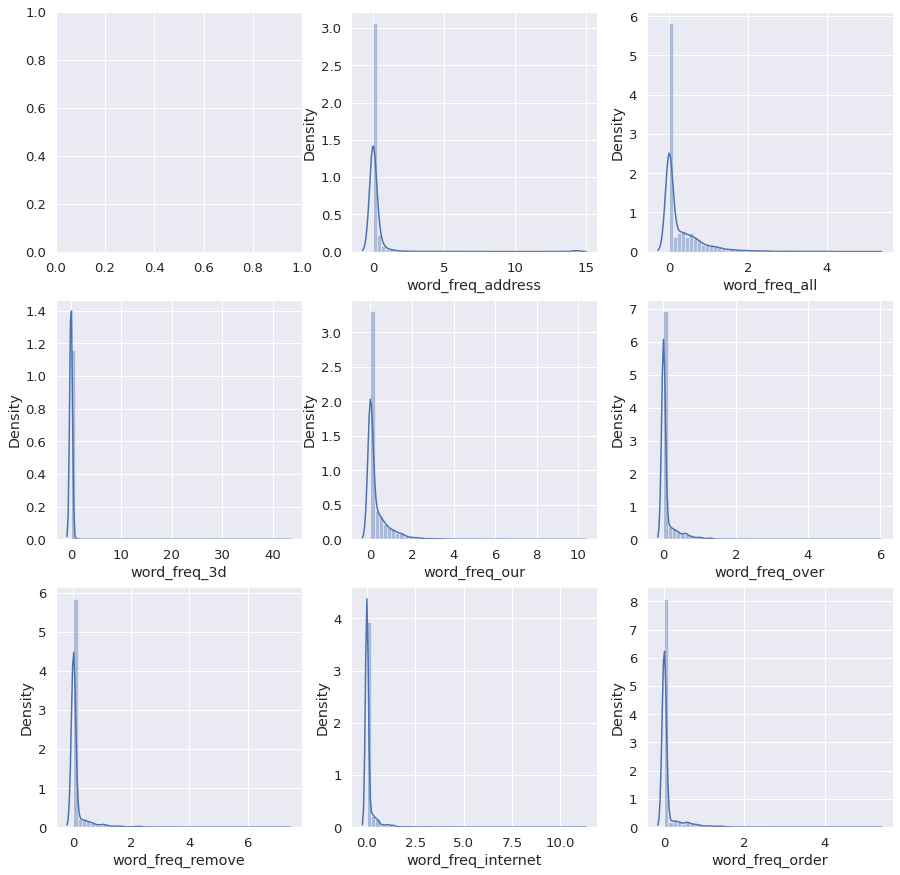

In [41]:
#Plotting distribution plots for a few variables to see the type of distribution they possess
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=False)

sns.distplot( df['word_freq_address'],ax=axes[0, 1])
sns.distplot( df['word_freq_all'],ax=axes[0, 2])
sns.distplot( df['word_freq_3d'],ax=axes[1, 0])
sns.distplot( df['word_freq_our'],ax=axes[1, 1])
sns.distplot( df['word_freq_over'],ax=axes[1, 2])
sns.distplot( df['word_freq_remove'],ax=axes[2, 0])
sns.distplot( df['word_freq_internet'],ax=axes[2, 1])
sns.distplot( df['word_freq_order'],ax=axes[2, 2]) 

From the above few variables plotted, the distribution of these variables are not normal. It is therefore safe to assume that our data is not normally distributed.

### c.) Histograms

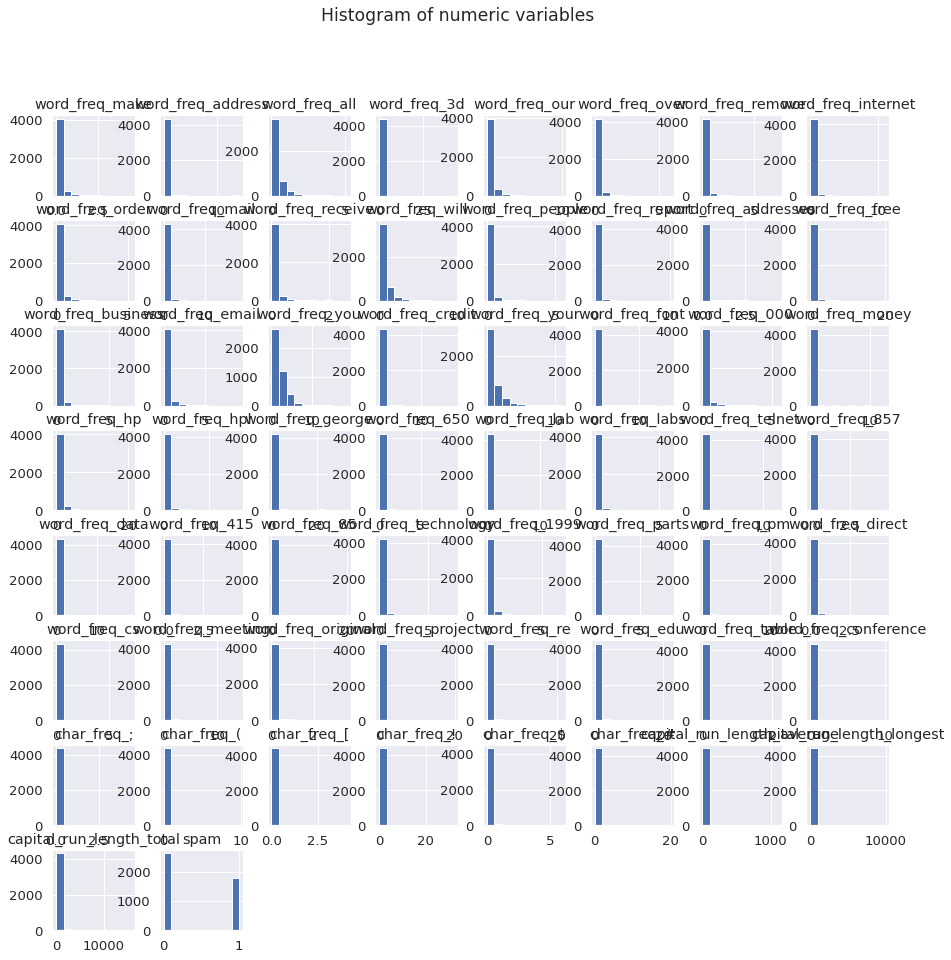

In [42]:
#Plotting the variables on histograms to view the distribution of each variable.
df.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram of numeric variables")
plt.savefig('Spambase Histogram')
plt.show()

The above chart shows that the distribution is right-skewed for all our variables, and there are extreme higher values at the right of the histogram.

Generally our data is very skewed.

### c.) Correlation

In [43]:
#Checking how our varibales are correlated using a matrix
corrMatrix = df.corr()
corrMatrix

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,-0.019076,0.058697,0.012661,0.017461,0.055140,0.003686,-0.007575,0.102287,0.036295,0.185152,0.099997,0.062431,0.034486,0.025914,0.055488,0.077872,0.048790,0.124958,0.019050,0.192320,-0.026036,0.130623,0.185842,-0.077357,-0.066059,-0.069783,-0.052034,-0.043662,-0.056074,-0.041384,-0.034114,-0.043540,-0.029762,-0.047817,-0.058196,-0.062019,-0.008801,-0.013654,-0.038752,-0.011389,-0.028518,-0.027202,-0.023924,-0.041355,-0.036876,-0.001935,-0.019333,-0.028758,-0.027645,-0.035528,0.054998,0.113713,-0.010283,0.043098,0.058291,0.083717,0.120732
word_freq_address,-0.019076,1.000000,-0.037364,-0.007237,-0.026681,-0.027235,0.001995,-0.018048,-0.005977,0.030610,-0.008845,-0.044163,-0.020971,-0.010374,0.004079,-0.011134,-0.020545,0.031295,-0.059736,-0.016934,-0.021880,-0.009638,-0.022468,0.000578,-0.045779,-0.040282,-0.031862,-0.030802,-0.023066,-0.029041,-0.019178,-0.004276,-0.026088,-0.005267,-0.025400,-0.029849,-0.026218,-0.009323,-0.020343,-0.016065,-0.016232,-0.026347,-0.003736,-0.020597,-0.018427,-0.025195,-0.010296,-0.016496,-0.008337,-0.053155,-0.019572,-0.016215,-0.011653,0.001266,0.001358,-0.001321,-0.025668,-0.034403
word_freq_all,0.058697,-0.037364,1.000000,-0.021399,0.069293,0.080661,0.030585,0.006351,0.087497,0.024231,0.042147,0.073025,0.041155,0.004787,0.118814,0.057830,0.029535,0.115371,0.132350,0.027655,0.147829,-0.038498,0.118309,0.036784,-0.095869,-0.069514,-0.114669,-0.056092,-0.061766,-0.037711,-0.042702,-0.065415,-0.058961,-0.065294,-0.053008,-0.052148,-0.074660,0.031306,-0.018867,-0.051446,-0.033802,-0.009624,-0.049146,-0.056602,-0.057591,-0.061372,0.027967,-0.028954,-0.036902,-0.027025,-0.036737,0.103419,0.081647,-0.005609,0.095625,0.102951,0.061200,0.189140
word_freq_3d,0.012661,-0.007237,-0.021399,1.000000,0.002458,-0.010698,0.019270,0.009789,-0.003068,-0.005660,-0.013558,-0.020356,-0.013812,0.011688,0.002352,0.006879,0.002874,0.018785,-0.011930,-0.005700,0.007271,0.027890,0.010842,0.034994,-0.015833,-0.014296,-0.011124,-0.010815,-0.008115,-0.010910,-0.007835,-0.006988,-0.008409,-0.007005,-0.006499,-0.006978,-0.008386,-0.002781,-0.004945,-0.007997,-0.005899,-0.008424,-0.009663,-0.006174,-0.013540,-0.009559,-0.003483,-0.002134,-0.000889,-0.013296,-0.007443,-0.003632,0.010309,-0.000491,0.005056,0.021656,0.020632,0.057195
word_freq_our,0.017461,-0.026681,0.069293,0.002458,1.000000,0.048482,0.143306,0.025317,0.015471,0.028437,0.063774,0.058814,0.026030,0.000496,0.053249,0.078437,0.138941,0.056870,0.092881,0.028841,0.127555,-0.022309,0.065548,-0.003574,-0.078575,-0.081017,-0.092371,-0.065781,0.029384,-0.056178,-0.045474,-0.029310,-0.035130,-0.029557,-0.053358,-0.053233,-0.078577,0.130403,-0.045332,-0.024697,-0.049785,0.112708,-0.052638,0.013149,-0.047661,-0.081751,-0.028236,-0.034050,-0.035612,-0.054496,-0.029155,0.020993,0.036664,0.000279,0.050957,0.048350,-0.005152,0.235284
word_freq_over,0.055140,-0.027235,0.080661,-0.010698,0.048482,1.000000,0.057312,0.076174,0.113423,0.008739,0.049950,0.002193,0.073581,0.007244,0.170946,0.015709,0.059907,0.073835,0.091308,0.056798,0.100795,0.006318,0.208250,0

We'll not visualize the correlations on a heat map as there are so many columns and would result to a clustered heat map with no clear vivid description of the correlations.

## 7. Implementing the Solution

### a.) Baseline Model

We'll build a baseline model from the provided dataset(without cleaning)

This model will be a benchmark for our other models and we'll use it's accuracy score to determine if our models perform better or not.

We'll use the Gaussian Naive Bayes Classifer since this type of classifier makes the assumption of normal distribution 
thus can be best used in cases when all our features are continuous i.e. in our case with this dataset.

In [47]:

# Defining the features and target variable

X = df.drop('spam', axis = 1)
y = df['spam']

In [48]:
#Training using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

In [49]:
#Training our model by fitting the train test with the Gaussian Naive Bayes Classifier
model = GaussianNB().fit(X_train, y_train)  

In [50]:
#Predicting our test predictors
predicted = model.predict(X_test)

In [51]:
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)

0.8463276836158192

Our baseline model does not perform badly and has an accuracy of 81.54% 
This score will be a benchmark for the models we build.

In [52]:
#Evaluating the model using a confusion matrix.
confusion_matrix(y_test, predicted)

array([[401, 117],
       [ 19, 348]])

According to the confusion matrix, our model has 156 false positives and 14 false negatives. This shows a low number of false negatives and a lot of false positives indicating that our baseline model has high recall but low precision.

However, the number of true positives and true negatives are a lot hence our model did not do badly.

### b.) Feature selection

We'll perform feature selection using Linear Discriminant Anlaysis to select those features which contribute most to the prediction variable.

Since we have so many features, having irrelevant features in our data can decrease the accuracy of the models and make our model learn based on irrelevant features.

In [54]:
#Separating the class variable from the other features
factors = df.drop(['spam'], 1)
class_label = df['spam']
factors.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [55]:
#Subject the features to an LDA model

#Importing Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#Creating an instance of LDA
lda = LDA()

lda_= lda.fit(factors, class_label)
lda_factors = lda_.transform(factors)

#Displaying the coeficients of the reducted columns
lda_.coef_

array([[-4.95805962e-01, -1.31570161e-01,  3.37286325e-01,
         1.10060850e-01,  7.68287265e-01,  1.08353433e+00,
         1.99882463e+00,  8.72892091e-01,  6.64793398e-01,
         1.29599288e-01,  5.68695628e-01, -2.93960004e-01,
         6.63945208e-02,  3.09418783e-02,  1.86336551e-01,
         6.99436013e-01,  4.90752301e-01,  5.15220417e-01,
         1.18047744e-01,  5.79556788e-01,  4.70368862e-01,
         4.15321395e-01,  1.65482165e+00,  8.68819535e-01,
        -2.35795208e-01, -2.19843685e-01, -1.28039460e-01,
         3.20939260e-02, -6.99643352e-02, -5.00035508e-01,
        -2.18140892e-01,  2.06714610e-01, -4.32124621e-01,
         4.29893997e-01, -3.10212789e-01,  2.05700379e-01,
        -3.51109669e-01, -5.09437143e-01, -1.93049464e-01,
         3.86439433e-01, -9.08773054e-02, -3.69806346e-01,
        -6.22222833e-01, -3.32572243e-01, -3.55533552e-01,
        -3.84643318e-01, -1.91489243e+00, -5.91694895e-01,
        -1.36611384e+00, -6.97943473e-01, -6.48885531e-0

In [56]:
#Creating a dataframe so that we can extract the name of the columns since the coefficients are in an array
factors_class = pd.DataFrame(index=factors.columns.values, data=lda_.coef_[0].T)
pd.options.display.float_format='{:.8f}'.format 
factors_class.sort_values(0, ascending=False) 

,0
char_freq_$,2.21863264
word_freq_remove,1.99882463
word_freq_000,1.65482165
word_freq_over,1.08353433
word_freq_internet,0.87289209
word_freq_money,0.86881953
word_freq_our,0.76828726
word_freq_free,0.69943601
word_freq_order,0.66479340
char_freq_!,0.63768807


The above dataframe shows the most relevant variables arranged in a descending order; from the most relevant to the least relevant.

The following are the top 20 features that are the most relevant in predicting our dependent variable; char_freq_%24, word_freq_remove, word_freq_000,word_freq_over, word_freq_internet, word_freq_money,word_freq_our, word_freq_free, word_freq_order,  char_freq_%21, word_freq_credit, word_freq_receive, word_freq_email, word_freq_business, word_freq_your, word_freq_415, word_freq_font,word_freq_direct, word_freq_all, char_freq_%23

### c.) Building the model

We'll now build models using Gaussian Naive Bayes Classifier and also use the top 20 features selected using LDA.

In [61]:
#Splitting the independent and dependent variables
test_features = df.columns.to_list()
test_features.remove('spam')

X = df[['word_freq_remove', 'word_freq_000', 'word_freq_over',
        'word_freq_internet', 'word_freq_money' , 'word_freq_our' , 'word_freq_free', 
        'word_freq_order', 'word_freq_credit', 'word_freq_receive', 
        'word_freq_email', 'word_freq_business', 'word_freq_your', 'word_freq_415', 
        'word_freq_font', 'word_freq_direct', 'word_freq_all']]
y = df['spam']

#### i.) 80-20 Split

In [62]:
#Training using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) 

In [63]:
#Training our model by fitting the train test with the Gaussian Naive Bayes Classifier
model = GaussianNB().fit(X_train, y_train)  

In [64]:
#Predicting our test predictors
predicted = model.predict(X_test)

In [65]:
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)

0.8372881355932204

Our model has an accuracy score of 83.16%. This is better than the baseline model, indicating that our model did a better job than the baseline model.

In [66]:
#Evaluating the model using a confusion matrix.
confusion_matrix(y_test, predicted)

array([[482,  36],
       [108, 259]])

The confusion matrix shows a lot of false negatives and very little false positives. This is different from the baseline model however our model now has low recall but high precision.

#### ii.) 70-30 Split

We'll train our model using 70% of the dataset and 30% will be the test set.

In [67]:
#Training using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) 

In [68]:
#Training our model by fitting the train test with the Gaussian Naive Bayes Classifier
model = GaussianNB().fit(X_train, y_train)

In [69]:
#Predicting our test predictors
predicted = model.predict(X_test)

In [70]:
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)

0.8335843373493976

Using the 70-30 split, we get an accuracy of 84.26% which is a higher accuracy than the 80-20 split and the baseline model.

In [71]:
#Evaluating the model using a confusion matrix.
confusion_matrix(y_test, predicted)

array([[719,  68],
       [153, 388]])

The confusion matrix still shows a lot of false negatives and a few false positives.This still shows low recall but high precision of our model.

#### iii.) 60-40 Split

We'll now train our model using 60% of the dataset and 40% will be the test set.

In [72]:
#Training using 60% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6) 

In [73]:
#Training our model by fitting the train test with the Gaussian Naive Bayes Classifier
model = GaussianNB().fit(X_train, y_train)

In [74]:
#Predicting our test predictors
predicted = model.predict(X_test)

In [75]:
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)

0.8361581920903954

The accuracy score of our model is 83.36%, higher than all the other models hence this model does a better job.

In [76]:
#Evaluating the model using a confusion matrix.
confusion_matrix(y_test, predicted)

array([[960,  84],
       [206, 520]])

The confusion matrix shows a higher number of true
positives and true negatives. However the false negatives are quite high and the false positive low but higher than the other models. This still shows a low recall and high precision in our model.

From the above, we can conclude that the further you split the datase, the higher the accuracy of our model.

### d.) Model Optimization

We will try improving the performance of the best model i.e. the 60-40 split model by normalizing our dataset. 

Therefore, if continuous features do not have a normal distribution(as we had seen), we will convert it to a normal distribution by normalization. 

In [79]:
#Splitting the independent and dependent variables
test_features = df.columns.to_list()
test_features.remove('spam')

X = data[['word_freq_remove', 'word_freq_000', 'word_freq_over',
        'word_freq_internet', 'word_freq_money' , 'word_freq_our' , 'word_freq_free', 
        'word_freq_order', 'word_freq_credit', 'word_freq_receive', 
        'word_freq_email', 'word_freq_business', 'word_freq_your', 'word_freq_415', 
        'word_freq_font', 'word_freq_direct', 'word_freq_all']]
y = data['spam']

In [80]:
#Training using 60% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6) 

In [81]:
#To normalize our data, we'll need to import the MinMaxScalar from the sklearn library and apply it to our dataset 
from sklearn.preprocessing import MinMaxScaler

#Fit scaler on training data
norm = MinMaxScaler().fit(X_train)

#Transform training data
X_train_norm = norm.transform(X_train)

#Transform testing data
X_test_norm = norm.transform(X_test)

In [82]:
#Training our model by fitting the train test with the Gaussian Naive Bayes Classifier
model = GaussianNB().fit(X_train_norm, y_train)
#Predicting our test predictors
predicted = model.predict(X_test_norm)
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)
#Evaluating the model using a confusion matri

0.8261814231395981

Although the accuracy score is slighlty lower than the model without normalization(82.61%) it is still considered a better model as it does better than the baseline model and the 80-20 split.

In [84]:
#Evaluating the model using a confusion matrix.
confusion_matrix(y_test, predicted)

array([[1023,   82],
       [ 238,  498]])

The confusion matrix still shows a higher number of true positives and true negatives. However the false negatives are quite high and the false positive low but higher than the other models. This still shows a low recall and high precision in our model.

## 8. Challenging the solution

The easy solution is nice because it is, well, easy, but we should not allow those results to hold the day.

The Gaussian Naive Bayes Classifier makes the assumption of normal distribution, our dataset did not have a normal distribution as we had seen in the distribution plots.

We will therefore challenge our model by using the Multinomial Naive Bayes Classifier as this classifier is commonly used in text classification (where the data are typically represented as word vector counts as in the case with our dataset)

In [86]:
#Splitting the independent and dependent variables
test_features = df.columns.to_list()
test_features.remove('spam')

X = df[['word_freq_remove', 'word_freq_000', 'word_freq_over',
        'word_freq_internet', 'word_freq_money' , 'word_freq_our' , 'word_freq_free', 
        'word_freq_order', 'word_freq_credit', 'word_freq_receive', 
        'word_freq_email', 'word_freq_business', 'word_freq_your', 'word_freq_415', 
        'word_freq_font', 'word_freq_direct', 'word_freq_all']]
y = df['spam']

In [87]:
#Training using 60% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6) 

In [88]:
#Training our model by fitting the train test with the Gaussian Naive Bayes Classifier
model = MultinomialNB().fit(X_train, y_train)

In [89]:
#Predicting our test predictors
predicted = model.predict(X_test)

In [90]:
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)

0.8158192090395481

The accuracy score of this model is 81.58% This does not beat the accuaracy of the Gaussian Classifier, however the scores are not so different. 

In [92]:
#Evaluating the model using a confusion matrix.
confusion_matrix(y_test, predicted)

array([[961,  83],
       [243, 483]])

This model still has a low recall and high precision as we can see from the confusion matrix i.e. high false negatives and low false positives.

## 9. Follow up questions

### a). Did we have the right data?

Yes, we had the right data for this project, however, the data is outdated as it is an old dataset according to the source. Acquiring new dataset would help in building better prediction models.

### b). Do we need other data to answer our question?

No, the variables are more than enough to predict whether an e-mail is spam or not.

### c). Did we have the right question?

Yes, we had the right question.